<a href="https://colab.research.google.com/github/nazaninzareirad/Amazon-Review-Analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown

google_drive_url = 'https://drive.google.com/file/d/1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW/view?usp=sharing'
file_id = google_drive_url.split("/")[-2]
output = 'train_data.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
To: /content/train_data.csv
100%|██████████| 635M/635M [00:04<00:00, 132MB/s]


'train_data.csv'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train_data.csv', low_memory=False)

Distribution of overall column

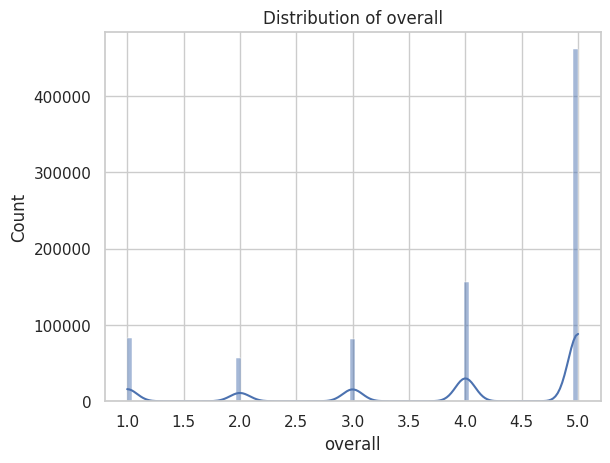

In [6]:
col = 'overall'
data = df[col]
sns.set(style="whitegrid")
sns.histplot(data, kde=True)
plt.title(f'Distribution of {col}')
plt.show()

Is the data normally distributed?

In [8]:
# Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = stats.shapiro(data)

if shapiro_p_value < 0.05:
    print(f'The {col} column does not follow a normal distribution (p-value: {shapiro_p_value})')
else:
    print(f'The {col} column follows a normal distribution (p-value: {shapiro_p_value})')


The overall column does not follow a normal distribution (p-value: 0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [9]:
# # normalizing the data
# transformed_data, lambda_value = stats.boxcox(data)

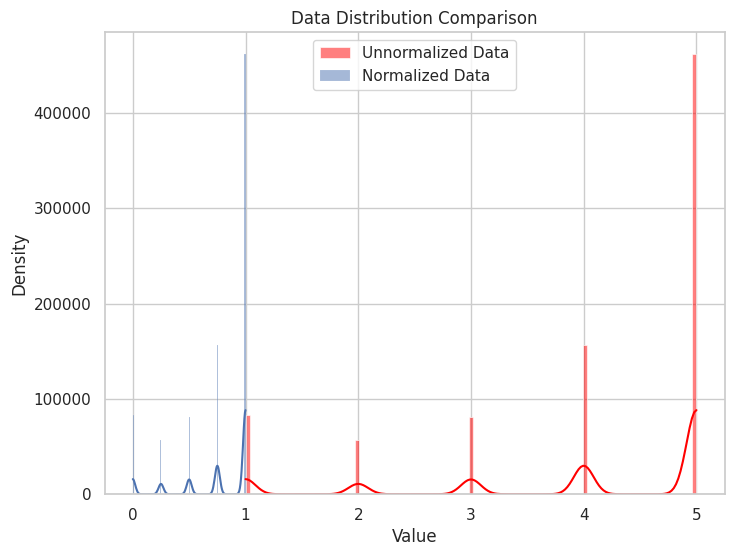

In [13]:
unnormalized_data = df['overall']
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize the "overall" column
normalized_data = scaler.fit_transform(unnormalized_data.values.reshape(-1, 1))


# Create a histogram for the unnormalized data
plt.figure(figsize=(8, 6))
sns.histplot(unnormalized_data, kde=True, color='red', label='Unnormalized Data')

# Create a histogram for the normalized data
sns.histplot(normalized_data, kde=True, color='blue', label='Normalized Data')

plt.title('Data Distribution Comparison')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()



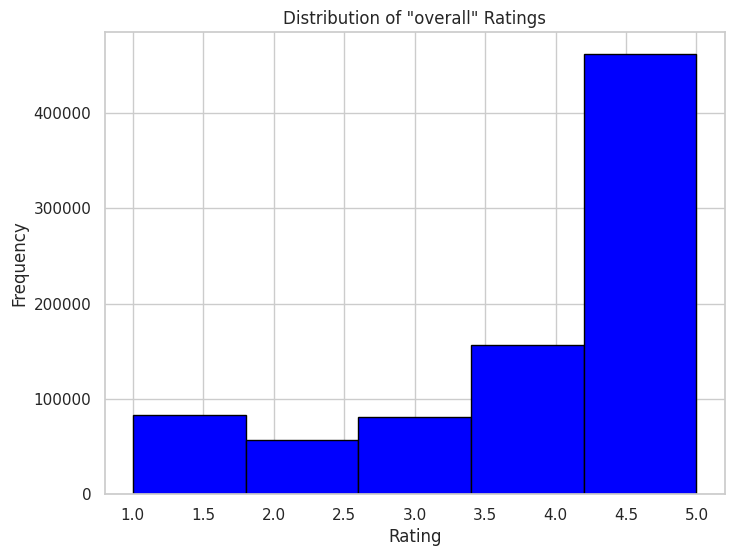

In [14]:
# Plot the distribution of the "overall" column
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['overall'], bins=5, color='blue', edgecolor='black')
plt.title('Distribution of "overall" Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


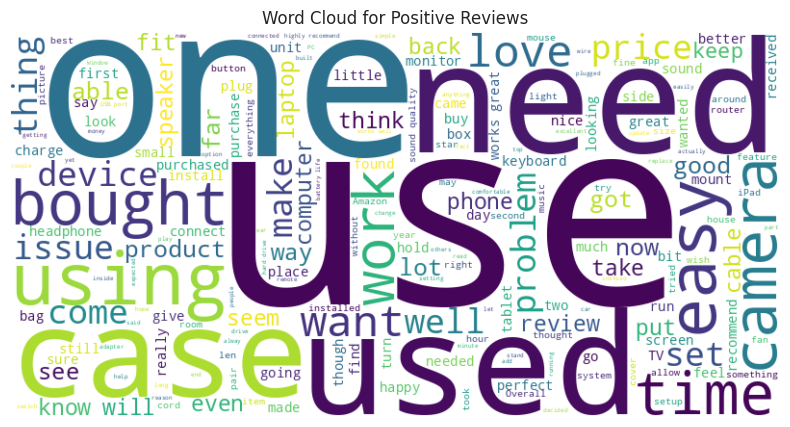

In [15]:
from wordcloud import WordCloud
from collections import Counter

# Sample code for positive reviews (replace with your own categorized data)
positive_reviews = df[df['overall'].isin([4, 5])]['reviewText']

# Combine positive reviews into a single string
positive_text = ' '.join(positive_reviews)

# Create a word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Reviews')
plt.show()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838742 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838869 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In [17]:
top_reviewers = df.nlargest(10, 'vote')[['reviewerName', 'vote']]

TypeError: ignored